In [22]:
import json

import requests
from datetime import datetime
from openpyxl import load_workbook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [29]:
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&apikey=f772cb1126msh67c279955f8b42bp10c102jsn5c6f540f61ce&outputsize=full'
r = requests.get(url)
data = r.json()

#print(data['Time Series (Daily)'])

y = []
x = []

for i in range(1, 100):
    x.append(i)
    y.append(int(float(data['Time Series (Daily)'][list(data['Time Series (Daily)'].keys())[i]]['1. open'])))

#for i in data['Time Series (Daily)'].keys():
    #y.append(data['Time Series (Daily)'][i]['1. open'])


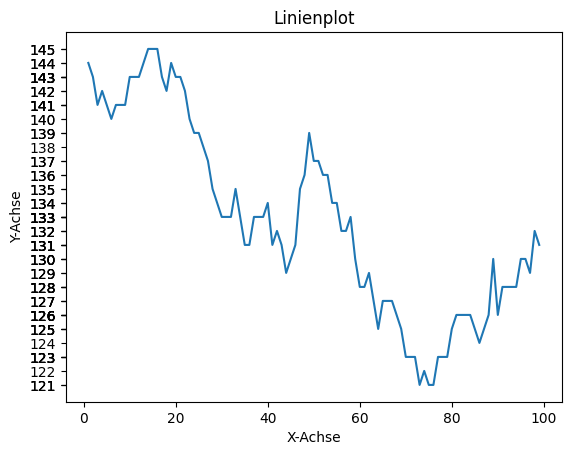

In [30]:
plt.plot(x, y)
plt.xlabel('X-Achse')
plt.ylabel('Y-Achse')
plt.title('Linienplot')
plt.yticks(y)
plt.show()

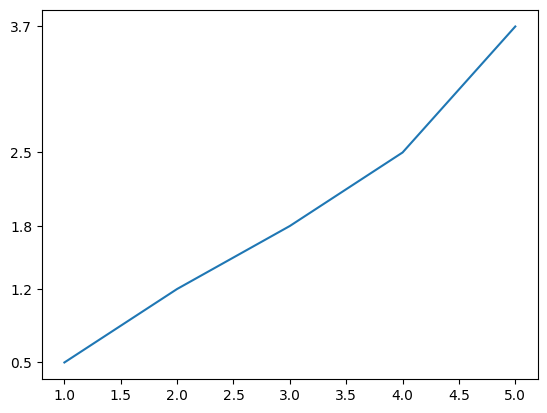

In [20]:
y_values = [0.5, 1.2, 1.8, 2.5, 3.7]  # Beispiel-Float-Werte
x_values = [1, 2, 3, 4, 5]

plt.plot(x_values, y_values)
plt.yticks(y_values)  # Manuelle Festlegung der Y-Tick-Markierungen
plt.show()

In [25]:



url1 = "https://yahoo-finance15.p.rapidapi.com/api/yahoo/hi/history/^GDAXI/1d"
url2 = "https://yahoo-finance15.p.rapidapi.com/api/yahoo/hi/history/^N225/1d"

querystring = {"diffandsplits": "false"}

headers = {
    "X-RapidAPI-Key": "f772cb1126msh67c279955f8b42bp10c102jsn5c6f540f61ce",
    "X-RapidAPI-Host": "yahoo-finance15.p.rapidapi.com"
}

response1 = requests.request("GET", url1, headers=headers, params=querystring).json()
response2 = requests.request("GET", url2, headers=headers, params=querystring).json()


In [26]:
dax_data = []
nikkei_data = []

for utc_time in dict(reversed(response1['items'].items())).keys():
    temp = response1['items'][utc_time]
    dax_data.append(int(temp['open']))

for utc_time in dict(reversed(response2['items'].items())).keys():
    temp = response2['items'][utc_time]
    nikkei_data.append(int(temp['open']))

dax_data = np.array(dax_data)
nikkei_data = np.array(nikkei_data)
    

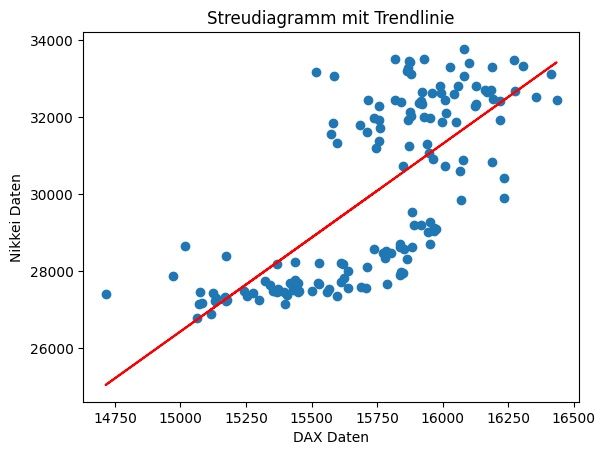

In [42]:
plt.scatter(dax_data[:150], nikkei_data[:150])

plt.xlabel('DAX Daten')
plt.ylabel('Nikkei Daten')
plt.title('Streudiagramm mit Trendlinie')

slope, intercept = np.polyfit(dax_data[:150], nikkei_data[:150], 1)
trendline = slope * dax_data[:150] + intercept
plt.plot(dax_data[:150], trendline, color='red')

plt.show()

Forschungsfrage: How do stock market movements in one country correlate with movements in another?
Was könnten interessante Daten sein? 
Es werden jetzt erstmal nur Deutschland, Amerika und Japan angeschaut (kann natürlich noch problemlos erweitert werden)
1. Vergleich der großen Aktienindizes (DAX, Nikkei225, Dow Jones, S&P500 etc.) auch auf zeitliche Verzögerungen achten evtl. sind ja zeitlich verzögert korreliert
2. Vergleich spezifischer Branchen der Länder (Techbranche, Gesundheitssektor etc.)
3. gucken wie sich wirtschaftliche Indikatoren in den einzelnen Ländern zu den Indizes verhalten und dieses Verhalten vergleichen
4. spezifische internationale Ereignisse (Finanzkrise, Corona, Wahlen etc.) und deren Auswirkung auf die einzelnen Länder betrachten und vergleichen
5. spezifische nationale Ereignisse (Wahlen, evtl. Gesetze etc.) und deren Auswirkung auf die einzelnen Länder betrachten und vergleichen

tradingeconomics.com (kostet evtl.)

Wiese hätte gerne: 

weitere Forschungsfrage: what's the relationship between crypto currencies and normal currencies?
Es werden als Währungen erstmal nur Euro, USD Dollar und Pfund betrachtet und als crypto Währung der Bitcoin
1. die einzelnen Kurse miteinander vergleichen
2. besonders starke Ausschweifungen betrachten (nochmal gucken was besonders stark heißen soll)
3. gucken wie sich beispielssweise der Zinssatz oder die Inflationsrate auf die beiden Währungen ausübt und das dann vergleichen

einzelne sektoren zeitlich zueinander verschieben und gucken wie sich dann die korrelation verändert

In [28]:
# Vergleich der großen Aktienindizes
# Daten ziehen

dict_indizes = {'DAX': '^GDAXI', 'Nikkei': '^N225', 'S&P500' : '^GSPC', 'Bovespa Index' : '^BVSP', 'MOEX Russia Index' : '^IMOEX', 
                'CAC 40 Index' : '^CAC', 'FTSE 100 Index': '^FTSE', 'Shanghai Composite Index' : '^SHCOMP'}

querystring = {"diffandsplits": "false"}

headers = {
    "X-RapidAPI-Key": "f772cb1126msh67c279955f8b42bp10c102jsn5c6f540f61ce",
    "X-RapidAPI-Host": "yahoo-finance15.p.rapidapi.com"
}

dict_values = {}

for key in dict_indizes.keys():
    url = "https://yahoo-finance15.p.rapidapi.com/api/yahoo/hi/history/" + dict_indizes[key] + "/1d"
    dict_values[key] = requests.request("GET", url, headers=headers, params=querystring).json()

In [19]:
# Daten vernünftig aufbereiten 
# Sie sollen die Form dictonary mit allen Indizes als keys haben und hinter jedem dictonary verbirgt sich wieder ein dictonary mit den Dates als keys und dann soll wieder ein 
# dictonary mit open, close.. sein
# also: dict {'DAX' : {'30-08-2023' : {'open' : 23, 'close' : 24}, '29-08-2023' : {'open' : 23, 'close' : 24}}, 'Nikkei' : {'30-08-2023' : {'open' : 23, 'close' : 24}, '29-08-2023' : {'open' : 23, 'close' : 24}}}

for key in dict_indizes.keys():
    new_dict = {}
    for utc_time in dict(reversed(dict_values[key]['items'].items())).keys():
        temp = dict_values[key]['items'][utc_time]
        new_dict[temp['date']] = {'open' : temp['open'], 'high' : temp['high'], 'low' : temp['low'], 'close' : temp['close'], 'volume' : temp['volume']}
    dict_values[key] = new_dict

dict_values['DAX']

{'08-30-2023': {'open': 15956.92,
  'high': 15960.4,
  'low': 15907.12,
  'close': 15940.67,
  'volume': 0},
 '08-29-2023': {'open': 15844.76,
  'high': 15942.12,
  'low': 15805.42,
  'close': 15930.88,
  'volume': 49760000},
 '08-28-2023': {'open': 15756.47,
  'high': 15804.95,
  'low': 15673.89,
  'close': 15792.61,
  'volume': 43473300},
 '08-25-2023': {'open': 15582.95,
  'high': 15739.78,
  'low': 15578.97,
  'close': 15631.82,
  'volume': 44315200},
 '08-24-2023': {'open': 15876.22,
  'high': 15896.74,
  'low': 15618.69,
  'close': 15621.49,
  'volume': 48251600},
 '08-23-2023': {'open': 15761.25,
  'high': 15820.95,
  'low': 15672.43,
  'close': 15728.41,
  'volume': 53425400},
 '08-22-2023': {'open': 15684.64,
  'high': 15799.34,
  'low': 15677.44,
  'close': 15705.62,
  'volume': 42807400},
 '08-21-2023': {'open': 15573.95,
  'high': 15710.21,
  'low': 15571.82,
  'close': 15603.28,
  'volume': 45251100},
 '08-18-2023': {'open': 15597.12,
  'high': 15612.88,
  'low': 15468.65,

In [16]:
#dict_values['DAX']
# interpolieren der Werte, bei fehlendem Datum wird der Durschnitt von Vor- und Nachgänger gebildet
# zuerst packen wir von jedem indize die Dates in eine Liste
dict_dates = {}

for key in dict_indizes.keys():
    list_dates = []
    for utc_time in dict(reversed(dict_values[key]['items'].items())).keys():
        date = dict_values[key]['items'][utc_time]['date']
        list_dates.append(date)
    dict_dates[key] = list_dates

# jetzt überprüfen, ob irgendwo ein Datum fehlt und dieses dann neu an entsprechender Stelle einpflegen
for key_i in dict_indizes.keys():
    for date in dict_dates[key_i]:
        # gucken ob dieses Date in allen anderen enthalten ist
        for key_k in dict_indizes.keys():
            if date not in list_dates[key_k]:
                # Datum ist nicht enthalten und wir müssen es einfügen
                


        # jetzt über alle anderen indizes gehen und gucken ob das Datum vorhanden ist
        #for key_k in dict_indizes.keys():
            #if key_k != key_i:
                #for utc_time_k in dict(reversed(dict_values[key_k]['items'].items())).keys():
                    #date_to_compare = dict_values[key_k]['items'][utc_time_k]['date']

                


08-30-2023
08-29-2023
08-28-2023
08-25-2023
08-24-2023
08-23-2023
08-22-2023
08-21-2023
08-18-2023
08-17-2023
08-16-2023
08-15-2023
08-14-2023
08-11-2023
08-10-2023
08-09-2023
08-08-2023
08-07-2023
08-04-2023
08-03-2023
08-02-2023
08-01-2023
07-31-2023
07-28-2023
07-27-2023
07-26-2023
07-25-2023
07-24-2023
07-21-2023
07-20-2023
07-19-2023
07-18-2023
07-17-2023
07-14-2023
07-13-2023
07-12-2023
07-11-2023
07-10-2023
07-07-2023
07-06-2023
07-05-2023
07-04-2023
07-03-2023
06-30-2023
06-29-2023
06-28-2023
06-27-2023
06-26-2023
06-23-2023
06-22-2023
06-21-2023
06-20-2023
06-19-2023
06-16-2023
06-15-2023
06-14-2023
06-13-2023
06-12-2023
06-09-2023
06-08-2023
06-07-2023
06-06-2023
06-05-2023
06-02-2023
06-01-2023
05-31-2023
05-30-2023
05-29-2023
05-26-2023
05-25-2023
05-24-2023
05-23-2023
05-22-2023
05-19-2023
05-18-2023
05-17-2023
05-16-2023
05-15-2023
05-12-2023
05-11-2023
05-10-2023
05-09-2023
05-08-2023
05-05-2023
05-04-2023
05-03-2023
05-02-2023
04-28-2023
04-27-2023
04-26-2023
04-25-2023

In [48]:
# Daten ganz leicht aufbereiten (Man müsste Sie eigentlich vorher noch interpolieren)
dax_data = []
nikkei_data = []
dowjones_data = []

for utc_time in dict(reversed(response_dax['items'].items())).keys():
    temp = response_dax['items'][utc_time]
    dax_data.append(int(temp['open']))

for utc_time in dict(reversed(response_nikkei['items'].items())).keys():
    temp = response_nikkei['items'][utc_time]
    nikkei_data.append(int(temp['open']))

for utc_time in dict(reversed(response_dowjones['items'].items())).keys():
    temp = response_dowjones['items'][utc_time]
    dowjones_data.append(int(temp['open']))

dax_data = np.array(dax_data)[:500]
nikkei_data = np.array(nikkei_data)[:500]
dowjones_data = np.array(dowjones_data)[:500]

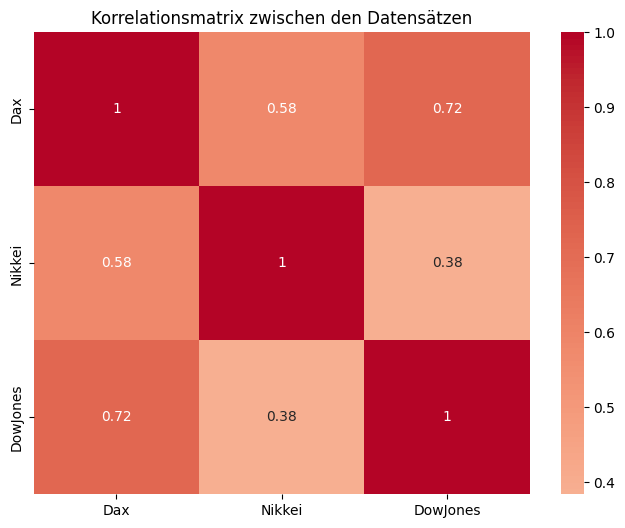

In [50]:
#plotten der Daten

data = {
    'Dax': dax_data,
    'Nikkei': nikkei_data,
    'DowJones': dowjones_data
}

# Erstelle ein Pandas DataFrame aus den NumPy-Arrays
df = pd.DataFrame(data)
# Kombiniere die DataFrames zu einem gemeinsamen DataFrame
#combined_df = pd.concat([df1, df2, df3], axis=1)

# Berechne die Korrelationsmatrix
correlation_matrix = df.corr()

# Erstelle die Heatmap mit Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Korrelationsmatrix zwischen den Datensätzen')
plt.show()

In [74]:
# Ersetzen Sie 'IHR_API_SCHLÜSSEL' durch Ihren Alpha Vantage API-Schlüssel
api_key = 'f772cb1126msh67c279955f8b42bp10c102jsn5c6f540f61ce'

# Die URL für den Abruf des DAX-Kurses von Alpha Vantage
url = f'https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=DAX&outputsize=full&apikey={api_key}'
#'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=GDAXI&apikey=f772cb1126msh67c279955f8b42bp10c102jsn5c6f540f61ce&outputsize=full'

# Eine GET-Anfrage an die API senden
response = requests.get(url)

# Die Antwort in JSON-Format umwandeln
data = response.json()

data

#print(data['Time Series (Daily)'].items())

{'Meta Data': {'1. Information': 'Monthly Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'DAX',
  '3. Last Refreshed': '2023-09-01',
  '4. Time Zone': 'US/Eastern'},
 'Monthly Time Series': {'2023-09-01': {'1. open': '29.0100',
   '2. high': '29.0100',
   '3. low': '28.6300',
   '4. close': '28.7200',
   '5. volume': '3455'},
  '2023-08-31': {'1. open': '30.0800',
   '2. high': '30.0800',
   '3. low': '28.1600',
   '4. close': '28.9800',
   '5. volume': '236849'},
  '2023-07-31': {'1. open': '29.5200',
   '2. high': '30.6242',
   '3. low': '28.2750',
   '4. close': '30.4100',
   '5. volume': '196262'},
  '2023-06-30': {'1. open': '29.0600',
   '2. high': '30.8900',
   '3. low': '28.9000',
   '4. close': '29.6100',
   '5. volume': '275400'},
  '2023-05-31': {'1. open': '30.1900',
   '2. high': '30.4137',
   '3. low': '28.6301',
   '4. close': '28.7900',
   '5. volume': '243767'},
  '2023-04-28': {'1. open': '29.3500',
   '2. high': '30.4200',
   '3. low': '29.1700',
   '4.

In [70]:


querystring = {"diffandsplits": "false"}

headers = {
    "X-RapidAPI-Key": "f772cb1126msh67c279955f8b42bp10c102jsn5c6f540f61ce",
    "X-RapidAPI-Host": "yahoo-finance15.p.rapidapi.com"
}

dict_values = {}

url = "https://yahoo-finance15.p.rapidapi.com/api/yahoo/hi/history/XU100.IS/1d"
print(requests.request("GET", url, headers=headers, params=querystring).json())

{'meta': {'currency': 'TRY', 'symbol': 'XU100.IS', 'exchangeName': 'IST', 'instrumentType': 'INDEX', 'firstTradeDate': 867738600, 'regularMarketTime': 1693581011, 'gmtoffset': 10800, 'timezone': 'TRT', 'exchangeTimezoneName': 'Europe/Istanbul', 'regularMarketPrice': 8056.12, 'chartPreviousClose': 66973.1, 'priceHint': 2, 'dataGranularity': '1d', 'range': ''}, 'items': {'1378189800': {'date': '09-03-2013', 'date_utc': 1378189800, 'open': 68828.6, 'high': 68828.6, 'low': 66862.1, 'close': 66973.1, 'volume': 538472000, 'adjclose': 66973.1}, '1378276200': {'date': '09-04-2013', 'date_utc': 1378276200, 'open': 67375.4, 'high': 67609.8, 'low': 66668.4, 'close': 66965.8, 'volume': 471476000, 'adjclose': 66965.8}, '1378362600': {'date': '09-05-2013', 'date_utc': 1378362600, 'open': 66933.2, 'high': 67227.3, 'low': 66212.7, 'close': 66715.1, 'volume': 431348000, 'adjclose': 66715.1}, '1378449000': {'date': '09-06-2013', 'date_utc': 1378449000, 'open': 66768.8, 'high': 68171.9, 'low': 66464.3, '